In [173]:
import pandas as pd
import numpy as np


In [174]:
import chardet


with open('../input/GSAF5.csv', 'rb') as f:
    result = chardet.detect(f.read())  


data = pd.read_csv('../input/GSAF5.csv', encoding=result['encoding'])

data.head()



,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [175]:
print(data.shape)

(5992, 24)


In [176]:
# Get column names
column_names = data.columns
print(column_names)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [177]:
# Get column data types
data.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [178]:
# check if the column is unique
data_d = data.drop_duplicates()
print(data_d.shape)

(5992, 24)


In [179]:
null_cols = data.isnull().sum()
null_cols
null_cols[null_cols > 0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [180]:
data[(data["Unnamed: 22"].notnull())].index

Int64Index([1247], dtype='int64')

In [181]:
data[(data["Unnamed: 23"].notnull())].index

Int64Index([4182, 5585], dtype='int64')

In [182]:
data_22 = data.loc[~data['Unnamed: 22'].isnull()]
data_22

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN


In [183]:
#data2 =data.loc[data['Unnamed: 23'] != 0]

data_23 = data.loc[~data['Unnamed: 23'].isnull()]
data_23

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [184]:
drop_cols = list(null_cols[null_cols > 1000].index)
drop_cols
data2 = data.drop(drop_cols, axis=1)
data2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [185]:
print(data2.shape)

(5992, 19)


In [186]:
# Delete columns that are not relevant for my theory

data3 = data2.drop(['Case Number', 'Area', 'Date', 'Name', 'Injury', 'Location', 'Activity', 'Type', 'original order', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2'], axis =1)
data3


,Year,Country,Sex,Fatal (Y/N)
0,2016,USA,M,N
1,2016,USA,M,N
2,2016,USA,M,N
3,2016,AUSTRALIA,M,N
4,2016,AUSTRALIA,M,N
...,...,...,...,...
5987,0,AUSTRALIA,M,Y
5988,0,AUSTRALIA,M,Y
5989,0,USA,M,Y
5990,0,PANAMA,M,Y


In [187]:
# check null cells per column

null_cols = data3.isnull().sum()
null_cols
null_cols[null_cols > 0]

Country         43
Sex            567
Fatal (Y/N)     19
dtype: int64

In [188]:
#deleting rows where Year is 0

data4 = data3[data3.Year != 0]

data4

,Year,Country,Sex,Fatal (Y/N)
0,2016,USA,M,N
1,2016,USA,M,N
2,2016,USA,M,N
3,2016,AUSTRALIA,M,N
4,2016,AUSTRALIA,M,N
...,...,...,...,...
5863,1554,FRANCE,M,UNKNOWN
5864,1543,VENEZUELA,M,Y
5865,500,MEXICO,NaN,N
5866,77,NaN,M,Y


In [189]:
# Deleting years before the 21st century

data5 = data4[data4.Year > 1999]
data5

,Year,Country,Sex,Fatal (Y/N)
0,2016,USA,M,N
1,2016,USA,M,N
2,2016,USA,M,N
3,2016,AUSTRALIA,M,N
4,2016,AUSTRALIA,M,N
...,...,...,...,...
1850,2000,NEW ZEALAND,M,N
1851,2000,AUSTRALIA,M,N
1852,2000,REUNION,M,Y
1853,2000,THAILAND,M,Y


In [190]:
# Again checking for null cells in columns

null_cols = data5.isnull().sum()
null_cols
null_cols[null_cols > 0]

Country         1
Sex            96
Fatal (Y/N)     2
dtype: int64

In [191]:
# Check for unique values per column 

for col in data5.columns:
    print(col,'->', data5[col].nunique())

Year -> 17
Country -> 94
Sex  -> 4
Fatal (Y/N) -> 3


In [192]:
# Renaming sex column as it had a space

data6 = data5.rename(columns = {'Sex ':'Sex'})
data6.head()

,Year,Country,Sex,Fatal (Y/N)
0,2016,USA,M,N
1,2016,USA,M,N
2,2016,USA,M,N
3,2016,AUSTRALIA,M,N
4,2016,AUSTRALIA,M,N


In [193]:
print(set(data6['Sex']))

{nan, 'M ', 'F', 'lli', 'M'}


In [194]:
#data2 =data.loc[data['Unnamed: 23'] != 0]

data6_sex = data6.loc[data6['Sex'] == "lli"]
data6_sex

,Year,Country,Sex,Fatal (Y/N)
1400,2004,USA,lli,N


In [195]:
data6_sex2 = data6[(data6["Sex"] == "lli")].index
data6_sex2

Int64Index([1400], dtype='int64')

In [196]:
data7 = data6.set_value([1400], 'Sex', "UNKNOWN")
data7

print(set(data7['Sex']))

{nan, 'M ', 'UNKNOWN', 'F', 'M'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [197]:
data7_sex2 = data6[(data6["Sex"] == "M ")].index
data7_sex2

Int64Index([341, 1363], dtype='int64')

In [206]:
data8 = data7.set_value([341, 1363], 'Sex', "M")
data8

print(set(data8['Sex']))

{nan, 'F', 'M', 'UNKNOWN'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [207]:
for col in data8.columns:
    print(col,'->', data8[col].nunique())
    


Year -> 17
Country -> 94
Sex -> 3
Fatal (Y/N) -> 3


In [208]:
data8_sex = data8.loc[~data8['Sex'].notnull()]
data8_sex

,Year,Country,Sex,Fatal (Y/N)
5,2016,AUSTRALIA,NaN,N
29,2016,USA,NaN,N
81,2016,USA,NaN,N
109,2015,AUSTRALIA,NaN,N
225,2015,ATLANTIC OCEAN,NaN,N
...,...,...,...,...
1824,2000,USA,NaN,N
1830,2000,NEW CALEDONIA,NaN,Y
1831,2000,AUSTRALIA,NaN,Y
1842,2000,AUSTRALIA,NaN,N


In [209]:

data9 = data8.replace(np.nan, "UNKNOWN")
data9


,Year,Country,Sex,Fatal (Y/N)
0,2016,USA,M,N
1,2016,USA,M,N
2,2016,USA,M,N
3,2016,AUSTRALIA,M,N
4,2016,AUSTRALIA,M,N
...,...,...,...,...
1850,2000,NEW ZEALAND,M,N
1851,2000,AUSTRALIA,M,N
1852,2000,REUNION,M,Y
1853,2000,THAILAND,M,Y


In [210]:
print(set(data9['Sex']))

{'F', 'M', 'UNKNOWN'}


In [211]:
print(set(data9['Fatal (Y/N)']))

{'UNKNOWN', 'N', 'Y'}


In [212]:
print(set(data9['Year']))

{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [216]:
print(set(data9['Country']))

{'CROATIA', 'ST. MAARTIN', 'VENEZUELA', 'NEW CALEDONIA', 'ITALY', 'THAILAND', 'TURKS & CAICOS', 'URUGUAY', 'CAPE VERDE', 'ECUADOR', 'USA', 'MADAGASCAR', 'ISRAEL', 'MOZAMBIQUE', 'EGYPT', 'ST. MARTIN', 'SOUTH AFRICA', 'UNITED KINGDOM', 'SPAIN', 'BELIZE', 'SENEGAL', 'NEVIS', 'MEXICO', 'AZORES', 'BAHAMAS', 'DIEGO GARCIA', 'DOMINICAN REPUBLIC', 'PUERTO RICO', 'SAMOA', 'GULF OF ADEN', 'GRAND CAYMAN', 'YEMEN', 'Seychelles', 'VIETNAM', 'FIJI', 'NORWAY', 'GREECE', 'JAMAICA', 'CUBA', 'JAPAN', 'TRINIDAD & TOBAGO', 'HONDURAS', 'TANZANIA', 'TONGA', 'INDONESIA', 'VANUATU', 'MEXICO ', 'UNITED ARAB EMIRATES', 'REUNION', 'MAURITIUS', 'LIBERIA', 'NEW ZEALAND', 'COLUMBIA', 'SOUTH KOREA', 'FRENCH POLYNESIA', 'GUAM', 'CANADA', 'CARIBBEAN SEA', 'MICRONESIA', 'PANAMA', 'KIRIBATI', 'Sierra Leone', 'ARUBA', 'ENGLAND', 'UNITED ARAB EMIRATES (UAE)', 'COSTA RICA', 'SCOTLAND', 'FRANCE', 'PHILIPPINES', ' TONGA', 'UNKNOWN', 'MALAYSIA', 'SOLOMON ISLANDS', 'ATLANTIC OCEAN', 'CAYMAN ISLANDS', 'CHILE', 'PALESTINIAN TERR

In [223]:
data9['Country'] = data9['Country'].str.upper()
print(data9)

      Year      Country Sex Fatal (Y/N)
0     2016          USA   M           N
1     2016          USA   M           N
2     2016          USA   M           N
3     2016    AUSTRALIA   M           N
4     2016    AUSTRALIA   M           N
...    ...          ...  ..         ...
1850  2000  NEW ZEALAND   M           N
1851  2000    AUSTRALIA   M           N
1852  2000      REUNION   M           Y
1853  2000     THAILAND   M           Y
1854  2000          USA   M           N

[1855 rows x 4 columns]


In [224]:
print(set(data9['Country']))

{'CROATIA', 'ST. MAARTIN', 'VENEZUELA', 'NEW CALEDONIA', 'ITALY', 'THAILAND', 'TURKS & CAICOS', 'URUGUAY', 'CAPE VERDE', 'ECUADOR', 'USA', 'MADAGASCAR', 'ISRAEL', 'MOZAMBIQUE', 'EGYPT', 'ST. MARTIN', 'SOUTH AFRICA', 'UNITED KINGDOM', 'SPAIN', 'BELIZE', 'SENEGAL', 'SIERRA LEONE', 'NEVIS', 'MEXICO', 'AZORES', 'BAHAMAS', 'DIEGO GARCIA', 'DOMINICAN REPUBLIC', 'PUERTO RICO', 'SAMOA', 'GULF OF ADEN', 'GRAND CAYMAN', 'YEMEN', 'VIETNAM', 'FIJI', 'NORWAY', 'GREECE', 'JAMAICA', 'CUBA', 'JAPAN', 'TRINIDAD & TOBAGO', 'HONDURAS', 'TANZANIA', 'TONGA', 'INDONESIA', 'VANUATU', 'MEXICO ', 'UNITED ARAB EMIRATES', 'REUNION', 'MAURITIUS', 'LIBERIA', 'NEW ZEALAND', 'COLUMBIA', 'SOUTH KOREA', 'FRENCH POLYNESIA', 'GUAM', 'CANADA', 'CARIBBEAN SEA', 'MICRONESIA', 'PANAMA', 'KIRIBATI', 'ARUBA', 'ENGLAND', 'UNITED ARAB EMIRATES (UAE)', 'COSTA RICA', 'SCOTLAND', 'FRANCE', 'PHILIPPINES', ' TONGA', 'UNKNOWN', 'MALAYSIA', 'SOLOMON ISLANDS', 'ATLANTIC OCEAN', 'CAYMAN ISLANDS', 'CHILE', 'PALESTINIAN TERRITORIES', 'TAI

In [273]:
data9.Country = data9.Country.replace({"ST. MAARTIN": "ST. MARTIN", 'DIEGO GARCIA':'UNKNOWN', 'MEXICO ':'MEXICO', ' TONGA':'TONGA'})

print(set(data9['Country']))

{'CROATIA', 'VENEZUELA', 'NEW CALEDONIA', 'ITALY', 'THAILAND', 'TURKS & CAICOS', 'URUGUAY', 'CAPE VERDE', 'ECUADOR', 'USA', 'MADAGASCAR', 'ISRAEL', 'MOZAMBIQUE', 'EGYPT', 'ST. MARTIN', 'SOUTH AFRICA', 'UNITED KINGDOM', 'SPAIN', 'BELIZE', 'SENEGAL', 'SIERRA LEONE', 'NEVIS', 'MEXICO', 'AZORES', 'BAHAMAS', 'DOMINICAN REPUBLIC', 'PUERTO RICO', 'SAMOA', 'GULF OF ADEN', 'GRAND CAYMAN', 'YEMEN', 'VIETNAM', 'FIJI', 'NORWAY', 'GREECE', 'JAMAICA', 'CUBA', 'JAPAN', 'TRINIDAD & TOBAGO', 'HONDURAS', 'TANZANIA', 'TONGA', 'INDONESIA', 'VANUATU', 'UNITED ARAB EMIRATES', 'REUNION', 'MAURITIUS', 'LIBERIA', 'NEW ZEALAND', 'COLUMBIA', 'SOUTH KOREA', 'FRENCH POLYNESIA', 'GUAM', 'CANADA', 'CARIBBEAN SEA', 'MICRONESIA', 'PANAMA', 'KIRIBATI', 'ARUBA', 'ENGLAND', 'UNITED ARAB EMIRATES (UAE)', 'COSTA RICA', 'SCOTLAND', 'FRANCE', 'PHILIPPINES', 'UNKNOWN', 'MALAYSIA', 'SOLOMON ISLANDS', 'ATLANTIC OCEAN', 'CAYMAN ISLANDS', 'CHILE', 'PALESTINIAN TERRITORIES', 'TAIWAN', 'OKINAWA', 'BRITISH VIRGIN ISLANDS', 'INDIA', 

In [274]:
data10 = data9['Country'].value_counts()
data10.head(100)

USA                        925
AUSTRALIA                  339
SOUTH AFRICA               123
BRAZIL                      48
BAHAMAS                     44
                          ... 
HONDURAS                     1
GRAND CAYMAN                 1
SIERRA LEONE                 1
INDIA                        1
PALESTINIAN TERRITORIES      1
Name: Country, Length: 89, dtype: int64

In [311]:
data9["Country"].value_counts().sort_index()
data9

,Year,Country,Sex,Fatal (Y/N),Total,Total,Total,Total,Total
0,2016,USA,M,N,925,925,925,925,925
1,2016,USA,M,N,925,925,925,925,925
2,2016,USA,M,N,925,925,925,925,925
3,2016,AUSTRALIA,M,N,339,339,339,339,339
4,2016,AUSTRALIA,M,N,339,339,339,339,339
...,...,...,...,...,...,...,...,...,...
1850,2000,NEW ZEALAND,M,N,40,40,40,40,40
1851,2000,AUSTRALIA,M,N,339,339,339,339,339
1852,2000,REUNION,M,Y,28,28,28,28,28
1853,2000,THAILAND,M,Y,4,4,4,4,4


In [296]:
#data10 = data9.drop_duplicates()
#data10

#del data10['Total']
#ata10

In [302]:
data11 = data9.groupby('Country').head()
data11

,Year,Country,Sex,Fatal (Y/N),Total,Total,Total,Total,Total
0,2016,USA,M,N,925,925,925,925,925
1,2016,USA,M,N,925,925,925,925,925
2,2016,USA,M,N,925,925,925,925,925
3,2016,AUSTRALIA,M,N,339,339,339,339,339
4,2016,AUSTRALIA,M,N,339,339,339,339,339
...,...,...,...,...,...,...,...,...,...
1803,2000,TANZANIA,UNKNOWN,Y,5,5,5,5,5
1820,2000,TANZANIA,UNKNOWN,Y,5,5,5,5,5
1829,2000,TANZANIA,M,Y,5,5,5,5,5
1849,2000,ENGLAND,M,N,3,3,3,3,3


In [303]:
data12 = data9.groupby(["Country"], as_index=False).count()
data12

,Country,Year,Sex,Fatal (Y/N),Total,Total,Total,Total,Total
0,ANTIGUA,1,1,1,1,1,1,1,1
1,ARUBA,1,1,1,1,1,1,1,1
2,ATLANTIC OCEAN,4,4,4,4,4,4,4,4
3,AUSTRALIA,339,339,339,339,339,339,339,339
4,AZORES,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
84,USA,925,925,925,925,925,925,925,925
85,VANUATU,2,2,2,2,2,2,2,2
86,VENEZUELA,4,4,4,4,4,4,4,4
87,VIETNAM,10,10,10,10,10,10,10,10


ValueError: The column label 'Total' is not unique.

In [309]:
data9.sort_values(['Country','Total'],ascending=False).groupby('Country').head(3)
data9

ValueError: The column label 'Total' is not unique.

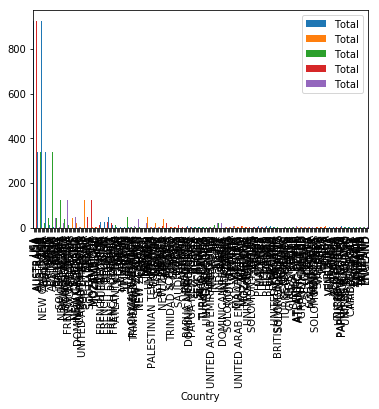

In [308]:
import matplotlib.pyplot as plt


# a simple line plot
data13.plot(kind='bar',x='Country',y='Total')